# A Finite Element Examples: Frame 02

This example is based on the frame02 example distributed with FEM.edu

It is a rotated version of frame01 to verify coordinate invariance

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import *

## Build a model

In [3]:
# ========== setting mesh parameters ==============

N = 8         # number of elements in the mesh
L = 100.0     # column free length


# ========== setting material parameters ==============

params = dict(
    E = 20000.,    # Young's modulus
    A = 100.0,     # cross section area
    I = 10.0       # cross section moment of inertia
)

# ========== setting load parameters ==============

w   = -0.1         # uniform lateral load on the column
Pcr = np.pi**2 * params['E'] * params['I'] / L**2    # Euler buckling load

# ========== setting analysis parameters ==============

target_load_level = 0.99      # 99% of Euler load
max_steps = 10                # solve max_steps points on the primary path


w   *= 0.01
Pcr *= 0.01
target_load_level = 99.      # 99% of Euler load



# define a list of target load levels
load_levels = np.linspace(0, target_load_level, max_steps)

#
# ==== Build the system model ====
#

model = System()
model.setSolver(NewtonRaphsonSolver())

# create nodes

nd0 = Node(0.0, 0.0)
model += nd0

ndi = nd0
for i in range(N):
    # nodes
    ndj = Node( 0.0, (i+1)*L/N )
    model += ndj

    # elements
    elem = Frame2D(ndi, ndj, ElasticSection(params))
    model += elem

    # ** apply the element portion of the reference load
    elem.setDistLoad(w)

    ndi = ndj    # jump to next element: make current end-node the next start-node

# define support(s)

nd0.fixDOF('ux', 'uy')    # horizontal support left end
ndi.fixDOF('ux')          # vertical support right end

# ==== complete the reference load ====

# these are only nodal forces as part of the reference load
# .. load only the upper node
ndi.setLoad((-Pcr,), ('uy',))


## Analyze the model

In [4]:

model.solve(verbose=True)

model.report()


norm of the out-of-balance force:   1.9743e+00
norm of the out-of-balance force:   3.2920e-04
norm of the out-of-balance force:   9.2303e-11
+

System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0. 0.], u:[ 0.          0.         -0.00021041]
  Node 1: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0.  12.5], fix:[], 
          P:[0. 0. 0.], u:[ 2.55316324e-03 -1.23370055e-05 -1.92346700e-04]
  Node 2: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0. 25.], fix:[], 
          P:[0. 0. 0.], u:[ 4.68537076e-03 -2.46740110e-05 -1.44693546e-04]
  Node 3: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0.  37.5], fix:[], 
          P:[0. 0. 0.], u:[ 6.08819829e-03 -3.70110165e-05 -7.72885446e-05]
  Node 4: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0. 50.], fix:[], 
          P:[0. 0. 0.], u:[ 6.57640083e-03 -4.93480220e-05 -2.36611224e-15]
  Node 5: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0.  62.5], fix:[], 
 

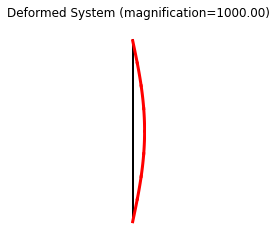

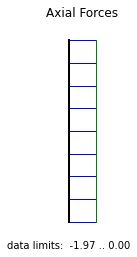

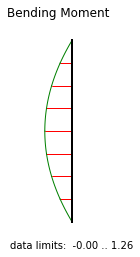

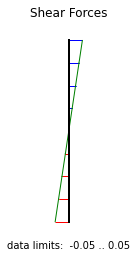

In [5]:
# create plots

model.plot(factor=1000.0, filename="frame2_deformed.png")

model.beamValuePlot("F", filename="frame2_force.png")
model.beamValuePlot("M", filename="frame2_moment.png")
model.beamValuePlot("V", filename="frame2_shear.png")

## Stability Analysis

In [6]:
# initialize the analysis:
model.resetDisplacements()   # set U to all zeros
model.setLoadFactor(0.0)     # define a known equilibrium solution

model.startRecorder()        # not doing anything yet, but will do the data collection soon

detKt   = []
lambdas = []

# solve for all load_levels
for loadfactor in load_levels:

    # define node X2 as the controled node; downward direction is prescribed:
    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    lambdas.append(model.loadfactor)
    detKt.append(model.solver.checkStability())

    # report results
    print('+')
    #model.report()

    print("\n=== next load level ===\n")


norm of the out-of-balance force:   1.9743e+00
norm of the out-of-balance force:   8.2767e-15
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.4321440383415878

+

=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   3.9834e-02
norm of the out-of-balance force:   3.5499e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.1646162525410557

+

=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   8.9520e-02
norm of the out-of-balance force:   2.5426e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.8970864808859564

+

=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   1.5323e-01
norm of the out-of-balance force:   2.8597e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.629554720728684

+

=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance fo

In [7]:
#
# ==== check the current state of the model ===
#

model.report()


System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0. 0.], u:[ 0.          0.         -2.03292855]
  Node 1: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0.  12.5], fix:[], 
          P:[0. 0. 0.], u:[ 2.47624315e+01 -1.22136354e-03 -1.87795981e+00]
  Node 2: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0. 25.], fix:[], 
          P:[0. 0. 0.], u:[ 4.57514676e+01 -2.44272709e-03 -1.43704758e+00]
  Node 3: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0.  37.5], fix:[], 
          P:[0. 0. 0.], u:[ 5.97734339e+01 -3.66409063e-03 -7.77608633e-01]
  Node 4: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0. 50.], fix:[], 
          P:[0. 0. 0.], u:[ 6.46967903e+01 -4.88545418e-03 -5.09273187e-13]
  Node 5: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0.  62.5], fix:[], 
          P:[0. 0. 0.], u:[ 5.97734339e+01 -6.10681772e-03  7.77608633e-01]
  Node 6: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0. 75.], fix:[],

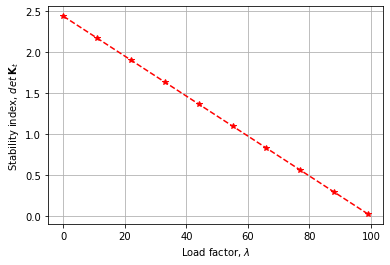

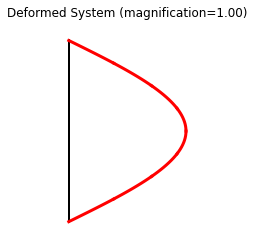

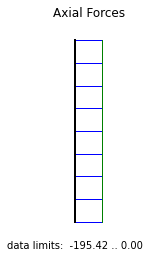

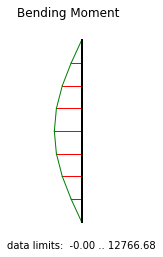

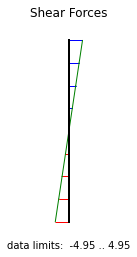

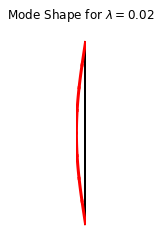

In [8]:
#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.show()

model.plot(factor=1.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

model.plotBucklingMode(factor=10., filename="frame2_buckling_mode0.png")
